In [26]:
import pandas as pd
from highcharts_core.chart import Chart
from highcharts_core.options.series.bar import ColumnRangeSeries
from highcharts_core.options.series.dumbbell import DumbbellSeries
from pathlib import Path
from copy import deepcopy
from deepmerge import always_merger
import seaborn as sns
import matplotlib.dates as md


In [2]:
col_range_opts = {
    'chart': {
        'type': 'columnrange',
        'inverted': True
    },

    'legend': {
        'enabled': False
    },

    'title': {
        'text': 'World Regions - DNS Resolver in Same AS Usage'
    },

    'tooltip': {
        'headerFormat': '<b>{point.key}</b><br/>',
        'pointFormat': '2022: {point.low:.2f}%<br/>' +
                       '2024: {point.high:.2f}%'
    },

    'xAxis': {
        'type': 'category',
        'categories': []
    },

    'yAxis': {
        'title': {
            'text': 'Percentage of Samples'
        }
    },
    'plotOptions': {
        'dumbbell': {
            'marker': {
                'lineWidth': 1
            }
        }
    },
}

In [72]:
dumbbell_opts = {
    'chart': {
        'type': 'dumbbell',
        'inverted': True
    },

    'legend': {
        'enabled': False
    },

    'title': {
        'text': 'something'
    },

    'tooltip': {
        'headerFormat': '<b>{point.key}</b><br/>',
        'pointFormat': '2022: {point.low:.2f}%<br/>' +
                       '2024: {point.high:.2f}%'
    },

    'xAxis': {
        'type': 'category',
        'categories': []
    },

    'yAxis': {
        'title': {
            'text': 'Percentage of Samples'
        }
    },
    'plotOptions': {
        'series': {
            'marker': {
                'radius': 5,
                'states': {
                    'hover': {
                        'lineWidth': 0
                    }
                }
            },
            'dataLabels': {
                'enabled': True,
                'color': 'contrast',
                'crop': False,
            }
        }
    },
}

In [3]:
def save_plot(chart: Chart, filename: str, directory: str = 'website'):
    with open(Path(directory) / Path(filename), 'w') as fp:
        chart.options.chart.styled_mode = True
        fp.write(chart.to_js_literal())


In [4]:
def generate_chart_from_comparison(datafile: str, chart_title: str, container: str, chart_file: str, directory: str = 'website'):
    cmp = pd.read_parquet(datafile)
    cmp['index'] = cmp.index.codes
    
    ratio_cols = [_ for _ in cmp.columns if 'ratio' in _]
    fc, lc = ratio_cols[0], ratio_cols[-1]

    cmp_inc = cmp[cmp['diff_2024_2022']>=0][[fc, lc]].to_records().tolist()
    cmp_dec = cmp[cmp['diff_2024_2022']<0][[fc, lc]].to_records().tolist()
    
    base_conf = deepcopy(col_range_opts)
    
    chart_conf = always_merger.merge(base_conf, {'title': {'text': chart_title},
                                                 'xAxis': {'categories': cmp.index.to_list()},
                                                 'series': [{'name': 'Increase', 'data': cmp_inc, 'dataLabels': {'enabled': True}},
                                                            {'name': 'Decrease', 'data': cmp_dec, 'dataLabels': {'enabled': True}}]})

    this_chart = Chart.from_options(chart_conf)
    this_chart.container = container
    
    save_plot(this_chart, chart_file, directory)
    

In [5]:
generate_chart_from_comparison(datafile='same_as_ratio_comparison.parquet',
                               chart_title='World Regions - DNS Resolver in Same AS Usage',
                               container='same_as_container',
                               chart_file='same_as_ratio_comparison.js',
                               directory='plots')

In [6]:
generate_chart_from_comparison(datafile='all_open_res_ratio_comparison.parquet',
                               chart_title='World Regions - All Open DNS Resolvers Usage',
                               container='all_open_res_container',
                               chart_file='all_open_res_ratio_comparison.js',
                               directory='plots')

In [87]:
t0 = pd.read_parquet('all_open_res_ratio_comparison.parquet').reset_index().query("region_name != 'Unclassified'")
t0

,region_name,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022
0,World,20.79,13.42,9.97,-10.82
1,Africa,33.21,25.16,14.70,-18.51
2,Eastern Africa,39.89,37.09,11.26,-28.63
3,Middle Africa,47.10,33.46,17.57,-29.53
4,Northern Africa,26.04,18.84,14.29,-11.75
5,Southern Africa,25.65,23.21,12.35,-13.30
6,Western Africa,34.87,20.14,17.99,-16.88
7,Americas,24.86,14.46,11.98,-12.88
8,Caribbean,28.45,21.30,20.70,-7.75
9,Central America,15.60,12.35,6.97,-8.63


In [88]:
t0.to_excel('All-Open-Resolver-usage-2022-to-2024.xlsx')

In [83]:
s0 = DumbbellSeries(name='Increase', marker={'enabled': True, 'symbol': 'triangle'}, low_marker={'enabled': False}, color='black')
s0.data = t0.query("diff_2024_2022 > 0").loc[:, ['region_name', 'all_open_res_ratio_Jun_2022', 'all_open_res_ratio_Jun_2024']].values
s1 = DumbbellSeries(name='Decrease', marker={'enabled': True, 'symbol': 'square'}, low_marker={'enabled': False}, color='red')
s1.data = t0.query("diff_2024_2022 < 0").loc[:, ['region_name', 'all_open_res_ratio_Jun_2022', 'all_open_res_ratio_Jun_2024']].values

In [84]:
base_conf = deepcopy(dumbbell_opts)

chart_conf = always_merger.merge(base_conf, {'title': {'text': 'Open Resolver Comparison'},
                                             'xAxis': {'categories': t0['region_name'].to_list()}})

In [85]:
chart0 = Chart.from_options(chart_conf)
chart0.add_series(s0)
chart0.add_series(s1)

In [86]:
chart0.container = 'new_chart'
save_plot(chart0, 'new_chart.js', 'plots')

In [82]:
c0 = pd.read_parquet('same_as_ratio_comparison.parquet')
c0['index'] = c0.index.codes

In [8]:
[_ for _ in c0.columns if 'ratio' in _][0]

'same_as_ratio_Jun_2022'

In [9]:
c0.columns

Index(['same_as_ratio_Jun_2022', 'same_as_ratio_Jun_2023',
       'same_as_ratio_Jun_2024', 'diff_2024_2022', 'index'],
      dtype='object')

In [10]:
c0.index.codes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int8)

In [11]:
c0.head(2)

,same_as_ratio_Jun_2022,same_as_ratio_Jun_2023,same_as_ratio_Jun_2024,diff_2024_2022,index
region_name,,,,,
World,63.3,65.25,66.02,2.72,0
Africa,57.6,59.49,57.01,-0.59,1


In [12]:
same_as_inc = c0[c0['diff_2024_2022']>=0][['same_as_ratio_Jun_2022', 'same_as_ratio_Jun_2024']].to_records().tolist()
same_as_dec = c0[c0['diff_2024_2022']<0][['same_as_ratio_Jun_2022', 'same_as_ratio_Jun_2024']].to_records().tolist()

In [13]:
same_as = c0[['same_as_ratio_Jun_2022', 'same_as_ratio_Jun_2024']].to_records(index=True).tolist()

In [14]:
same_as

[('World', 63.3, 66.02),
 ('Africa', 57.6, 57.01),
 ('Eastern Africa', 54.79, 46.49),
 ('Middle Africa', 49.83, 59.83),
 ('Northern Africa', 55.72, 55.43),
 ('Southern Africa', 62.42, 45.8),
 ('Western Africa', 62.12, 70.05),
 ('Americas', 63.14, 64.36),
 ('Caribbean', 70.5, 69.41),
 ('Central America', 76.37, 66.69),
 ('South America', 55.44, 55.38),
 ('Northern America', 65.88, 72.76),
 ('Asia', 62.61, 65.02),
 ('Central Asia', 58.5, 62.69),
 ('Eastern Asia', 71.28, 76.54),
 ('Southern Asia', 55.29, 53.75),
 ('South-Eastern Asia', 57.29, 56.84),
 ('Western Asia', 56.21, 64.83),
 ('Europe', 70.98, 80.24),
 ('Eastern Europe', 71.2, 79.5),
 ('Northern Europe', 75.63, 78.17),
 ('Southern Europe', 78.11, 81.32),
 ('Western Europe', 63.2, 81.25),
 ('Oceania', 82.64, 83.95),
 ('Australia and New Zealand', 84.74, 85.01),
 ('Melanesia', 64.93, 80.02),
 ('Micronesia', 61.57, 40.12),
 ('Polynesia', 65.27, 64.97),
 ('Unclassified', 0.11, 1.66)]

In [15]:
same_as_opts = {
    'chart': {
        'type': 'columnrange',
        'inverted': True
    },

    'legend': {
        'enabled': False
    },

    'title': {
        'text': 'World Regions - DNS Resolver in Same AS Usage'
    },

    'tooltip': {
        'headerFormat': '<b>{point.key}</b><br/>',
        'pointFormat': '2022: {point.low:.2f}%<br/>' +
                       '2024: {point.high:.2f}%'
    },

    'xAxis': {
        'type': 'category',
        'categories': c0.index.to_list(),
    },

    'yAxis': {
        'title': {
            'text': 'Percentage of Samples'
        }
    },
    'plotOptions': {
        'dumbbell': {
            'marker': {
                'lineWidth': 1
            }
        }
    },
    'series': [{
        'name': 'Same AS Increase',
        'data': same_as_inc
    }, {
        'name': 'Same AS Decrease',
        'data': same_as_dec
    }]

}

In [16]:
chart = Chart.from_options(same_as_opts)
chart.container = 'same_as_container'
save_plot(chart, 'same_as_ratio_comparison.js', 'plots')

In [17]:
id = pd.read_parquet('indonesia.parquet').query('rv_seen > 20_000')
id['rv_dt'] = pd.to_datetime(id['rv_dt'])

In [18]:
id.dtypes

rv_dt                  datetime64[ns]
rv_cc                          object
rv_type                        object
rv_seen                         int64
rv_rtyp_seen                   object
rv_seen_w                     float64
allopnrvrs                      int64
sameas                          int64
samecc                          int64
diffcc                          int64
cloudflare                      int64
cnnic                           int64
dnspai                          int64
dnspod                          int64
dnswatch                        int64
dyn                             int64
freedns                         int64
googlepdns                      int64
greenteamdns                    int64
he                              int64
level3                          int64
neustar                         int64
onedns                          int64
opendns                         int64
opennic                         int64
quad9                           int64
uncensoreddn

In [19]:
id.head(10)

,rv_dt,rv_cc,rv_type,rv_seen,rv_rtyp_seen,rv_seen_w,allopnrvrs,sameas,samecc,diffcc,...,outccx,diffcceu,diffccneu,out_cc_ratio,in_cc_ratio,same_as_ratio,google_pdns_ratio,all_open_res_ratio,non_open_res_ration,str_date
0,2022-01-01,ID,1q,898856,"[134938, 593747, 169340, 831, 12381, 0, 0, 0, ...",385267.0,134938,593747,169340,831,...,832,33,798,14.37,85.63,66.06,12.84,15.01,84.99,Jan_2022
1,2022-01-02,ID,1q,849951,"[123573, 566163, 159459, 756, 11554, 0, 2, 0, ...",428520.0,123573,566163,159459,756,...,756,27,729,13.90,86.10,66.61,12.41,14.54,85.46,Jan_2022
2,2022-01-03,ID,1q,896247,"[131680, 596916, 166605, 1046, 12859, 0, 0, 0,...",456137.0,131680,596916,166605,1046,...,1053,42,1004,14.10,85.90,66.60,12.54,14.69,85.31,Jan_2022
3,2022-01-04,ID,1q,895290,"[129574, 595573, 169000, 1143, 12695, 0, 1, 1,...",449464.0,129574,595573,169000,1143,...,1155,74,1069,13.90,86.10,66.52,12.34,14.47,85.53,Jan_2022
4,2022-01-05,ID,1q,843305,"[116566, 569951, 155666, 1122, 11750, 0, 1, 0,...",453888.0,116566,569951,155666,1122,...,1132,53,1069,13.27,86.73,67.59,11.75,13.82,86.18,Jan_2022
5,2022-01-06,ID,1q,819877,"[112251, 552080, 154537, 1009, 11478, 0, 3, 2,...",445542.0,112251,552080,154537,1009,...,1014,54,955,13.13,86.87,67.34,11.61,13.69,86.31,Jan_2022
6,2022-01-07,ID,1q,825882,"[119869, 550929, 154043, 1041, 12213, 0, 1, 0,...",426868.0,119869,550929,154043,1041,...,1054,44,997,13.94,86.06,66.71,12.34,14.51,85.49,Jan_2022
7,2022-01-08,ID,1q,895464,"[130134, 599345, 165250, 735, 12872, 0, 2, 0, ...",414556.0,130134,599345,165250,735,...,736,33,702,13.92,86.08,66.93,12.43,14.53,85.47,Jan_2022
8,2022-01-09,ID,1q,807346,"[109358, 545353, 151979, 656, 10737, 0, 5, 0, ...",412402.0,109358,545353,151979,656,...,657,16,640,12.96,87.04,67.55,11.53,13.55,86.45,Jan_2022
9,2022-01-10,ID,1q,920514,"[139197, 615232, 164965, 1120, 13774, 0, 0, 0,...",425143.0,139197,615232,164965,1120,...,1130,35,1085,14.54,85.46,66.84,12.91,15.12,84.88,Jan_2022


In [20]:
id['rv_seen'].min()

180850

In [21]:
id0 = id[['rv_dt', 'in_cc_ratio', 'all_open_res_ratio', 'google_pdns_ratio']].melt(id_vars=['rv_dt'], value_vars=['in_cc_ratio', 'all_open_res_ratio', 'google_pdns_ratio'])
id0['label'] = id0['variable'].map({'in_cc_ratio': 'In Country Resolver', 'all_open_res_ratio': 'All Open DNS Resolvers', 'google_pdns_ratio': 'Google Public DNS'})
id0.head(10)

,rv_dt,variable,value,label
0,2022-01-01,in_cc_ratio,85.63,In Country Resolver
1,2022-01-02,in_cc_ratio,86.10,In Country Resolver
2,2022-01-03,in_cc_ratio,85.90,In Country Resolver
3,2022-01-04,in_cc_ratio,86.10,In Country Resolver
4,2022-01-05,in_cc_ratio,86.73,In Country Resolver
5,2022-01-06,in_cc_ratio,86.87,In Country Resolver
6,2022-01-07,in_cc_ratio,86.06,In Country Resolver
7,2022-01-08,in_cc_ratio,86.08,In Country Resolver
8,2022-01-09,in_cc_ratio,87.04,In Country Resolver
9,2022-01-10,in_cc_ratio,85.46,In Country Resolver


[(0.0, 90.0)]

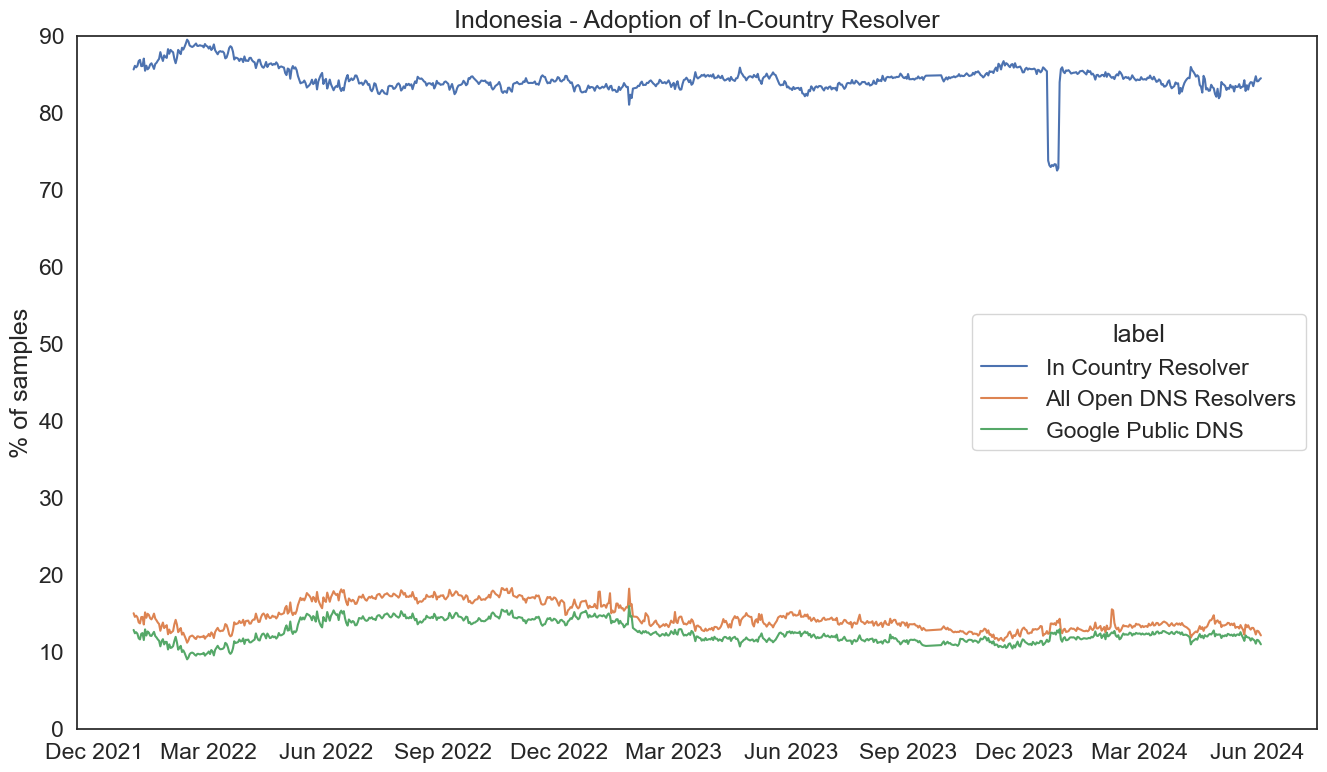

In [22]:
sns.set(rc={'figure.figsize': (16, 9)}, style='white', font_scale=1.5)
g0 = sns.lineplot(data=id0, x='rv_dt', y='value', hue='label')
g0.axes.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=3))
g0.axes.xaxis.set_major_formatter(md.DateFormatter('%h %Y'))
g0.set_title('Indonesia - Adoption of In-Country Resolver')
g0.set_xlabel('')
g0.set_ylabel('% of samples')
g0.set(ylim=[0, 90])
# g0.get_figure().autofmt_xdate()

In [23]:
g0.figure.savefig('indonesia.png')

<Axes: xlabel='rv_dt', ylabel='all_open_res_ratio'>

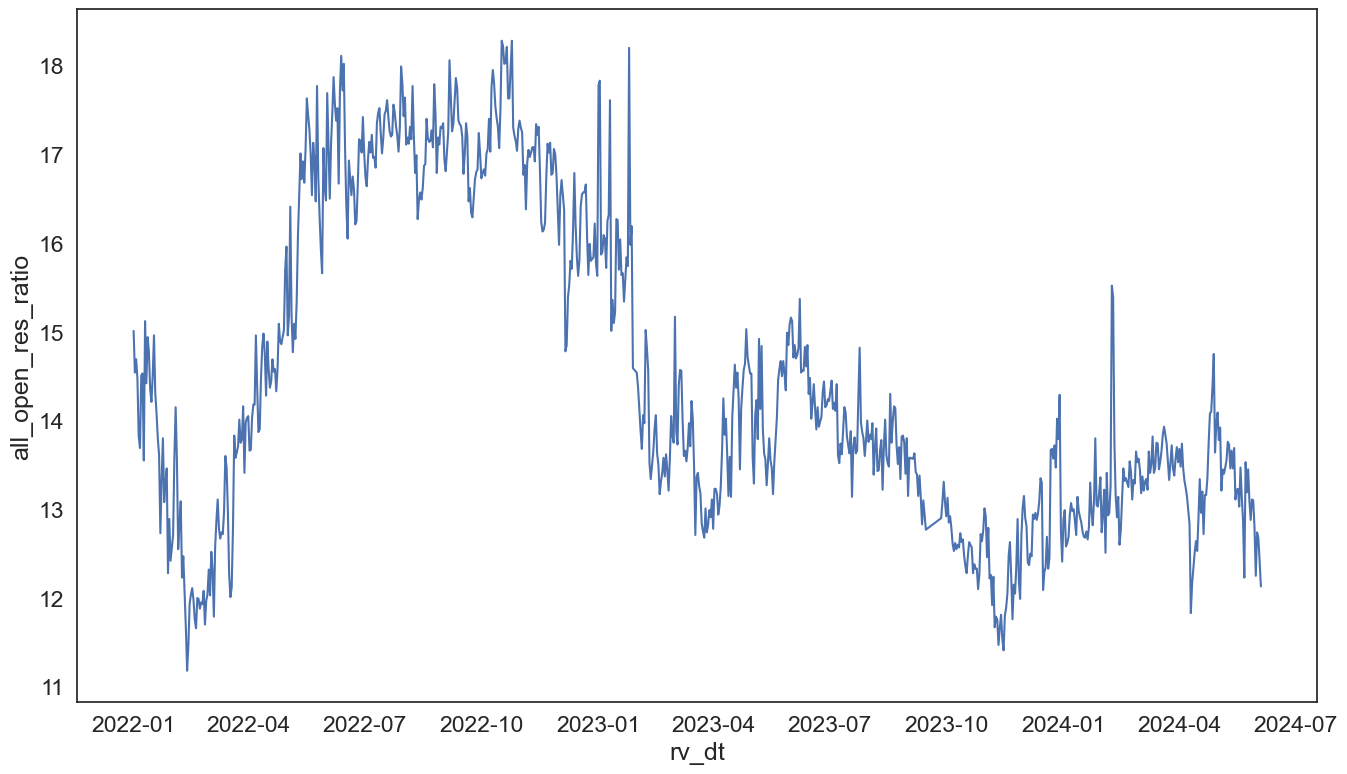

In [24]:
sns.lineplot(data=id, x='rv_dt', y='all_open_res_ratio')

<Axes: xlabel='rv_dt', ylabel='rv_seen'>

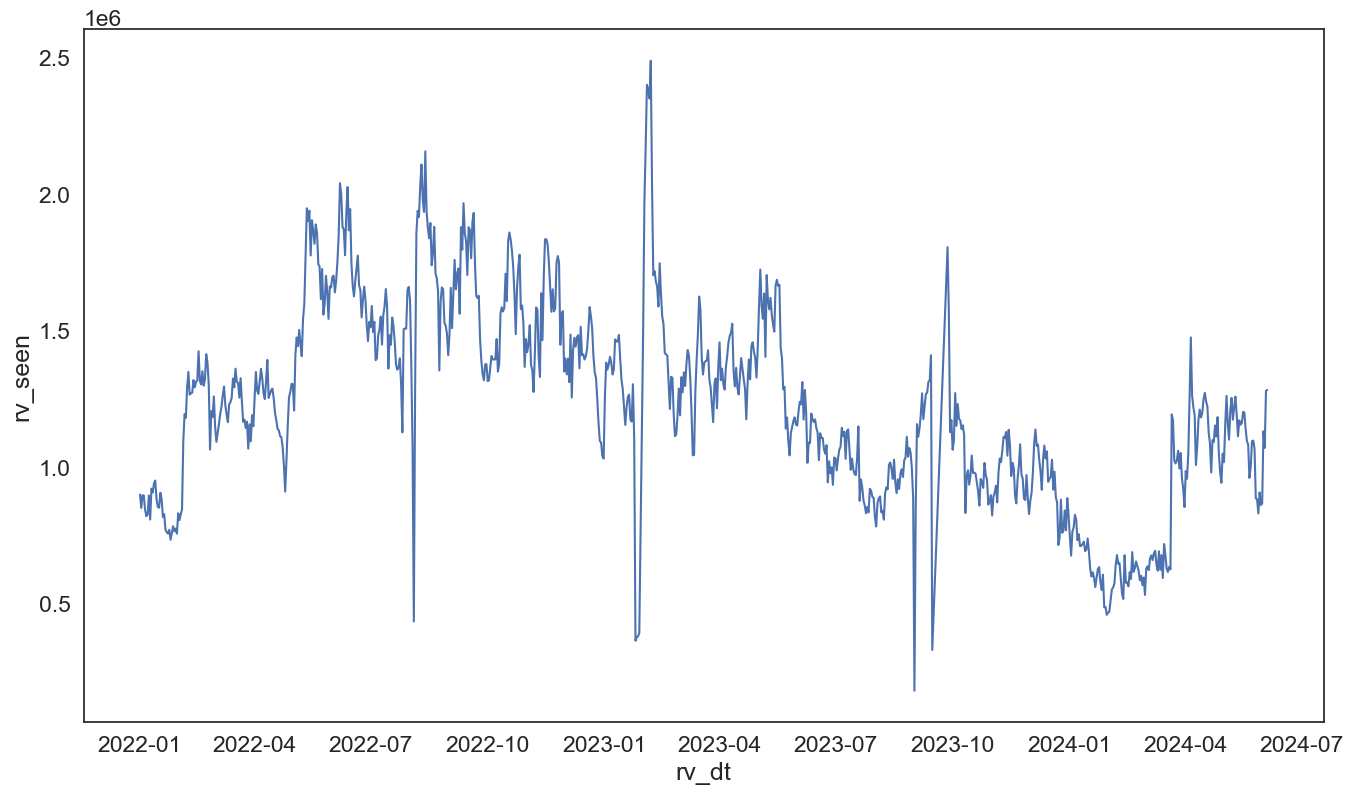

In [25]:
sns.lineplot(data=id, x='rv_dt', y='rv_seen')